In [ ]:
import pandas as pd 
import requests as rq
import numpy as np
import collections

In [ ]:
#matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mlp
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import rcParams

In [ ]:
#getting the speech from the url
website_url = rq.get('https://andina.pe/agencia/noticia-lea-aqui-mensaje-a-nacion-del-presidente-pedro-castillo-879806.aspx').text

In [ ]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(website_url, "lxml")

In [ ]:
#retriving text from "p" founds
data = [element.text for element in soup.find_all("div")]
#convert tu string
data = str(data)
data

'[\'\\n\\n\\n\\n\\n\\n\\nEnglish Version\\n\\n\\n\\n\\n\\nsearch\\nclose\\n\\n\\n\\n\\n\\n\', \'\\n\\n\\n\\n\\n\\nEnglish Version\\n\\n\\n\\n\\n\\nsearch\\nclose\\n\\n\\n\\n\\n\', \'\\n\\n\\n\\n\\nEnglish Version\\n\\n\\n\\n\\n\\nsearch\\nclose\\n\\n\\n\\n\', \'\\n\\n\', \'\\nEnglish Version\\n\', \'\\n\\n\\n\\nsearch\\nclose\\n\\n\\n\', \'\\n\\n\\nsearch\\nclose\\n\\n\', \'\\n\\nsearch\\nclose\\n\', \'\\n\\naccount_balancePolítica\\nequalizerEconomía\\nfilter_hdrRegionales\\nLocales\\npublicInternacional\\nlocal_playCultural\\nDeporte\\nstarsClic\\nstarsCiencia y Tecnología\\nstarsCambio Climático\\n\\n\', \'\\n\\nAndina al Día\\nMartes Educativo\\nSaludable Mente\\nSalud y Bienestar\\nRock en Rojo Blanco\\nMagnificamente Peruanos\\nTransmisiones Especiales\\nOrgullo Peruano\\n\\n\', \'\\n\\n\\n\\n\\n\\n\\n\', \'\\n\\n\\n\\nPolítica\\nEconomía\\nRegionales\\nLocales\\nInternacional\\nCultural\\nDeporte\\nClic\\nCiencia y Tecnología\\nCambio Climático\\n\\n\\n\\n\\nmenu\\n\\n\\n\\nhome

In [ ]:
# Reading data I found "\\n" and \\xa0" as a word, so I replace this with space
data = data.replace(u'\\xa0', u' ')
data = data.replace(u'\\n', u' ')
data = data.replace(u'English Version', u'')
data = data.replace(u'English version', u'')
data = data.replace(u'search close', u'')
data = data.replace(u'\'', u' ')
data = data.replace(u'access_time', u' ')
data

'[                     ,                    ,                  ,     ,     ,          ,        ,      ,    account_balancePolítica equalizerEconomía filter_hdrRegionales Locales publicInternacional local_playCultural Deporte starsClic starsCiencia y Tecnología starsCambio Climático   ,    Andina al Día Martes Educativo Saludable Mente Salud y Bienestar Rock en Rojo Blanco Magnificamente Peruanos Transmisiones Especiales Orgullo Peruano   ,          ,      Política Economía Regionales Locales Internacional Cultural Deporte Clic Ciencia y Tecnología Cambio Climático     menu    homeInicio art_trackLo último account_balancePolítica equalizerEconomía Locales filter_hdrRegionales publicInternacional local_playCultural Deporte starsClic starsCiencia y Tecnología starsCambio Climático     collectionsGalería live_tvCanal Online videocamVideos webEspeciales touch_appInteractivos micPodcast account_circleNosotros        Las más leídas        Lo último Actualidadarrow_drop_down Galería Canal Onli

In [ ]:
#words that we want to ignore
from stop_words import get_stop_words
#spanish stop words
stop_words_es = get_stop_words('es')

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [ ]:
stop_words = ["año", "mil", "pesos", "ciento", "millones", "tres", "ustedes","Pedro","Castillo","presidente","r"] + stop_words_es

amlo_wc = WordCloud(
    background_color = 'white',
    max_words = len(data),
    stopwords = stop_words
)
#generate wordcloud
amlo_wc.generate(data)

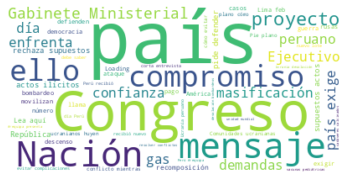

In [ ]:
#display the WordCloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

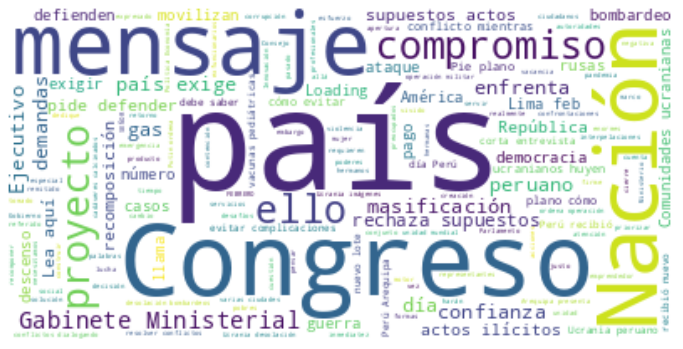

In [ ]:
#re generate the word cloud
amlo_wc.generate(data)

#display the cloud
fig = plt.figure()
#set width
fig.set_figwidth(12)
#set height
fig.set_figheight(16)

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

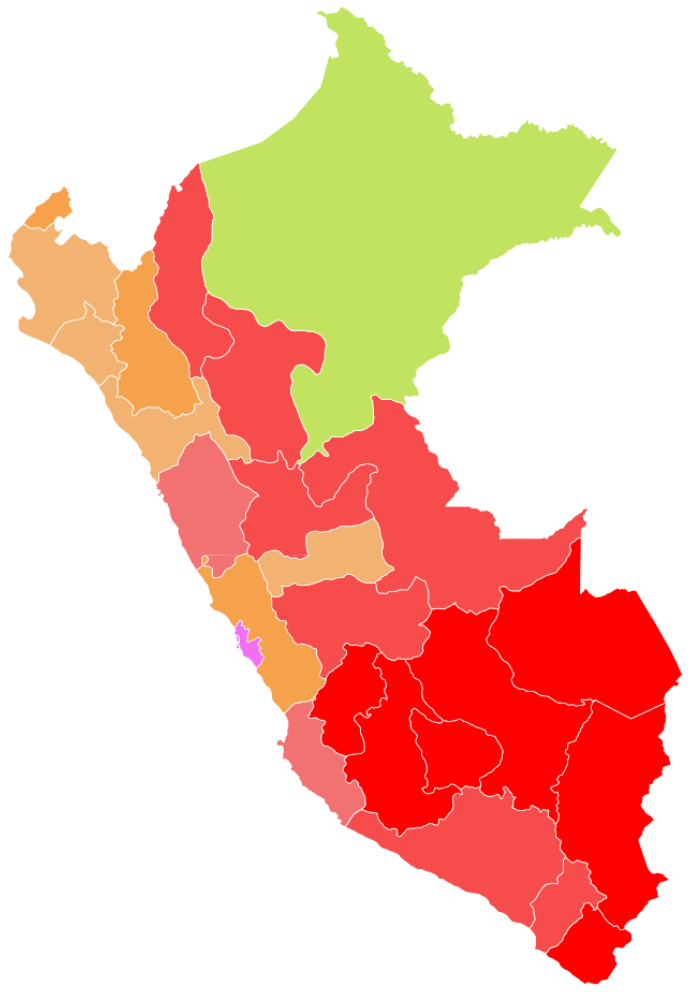

In [ ]:
#select from mi local disk the mask that I will use 

mx_mask = np.array(Image.open('peru3.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#mount the wordcloud generated before over the mask that I selected
amlo_wc_mx = WordCloud(background_color='white', max_words=len(data), mask=mx_mask, stopwords=stop_words)

amlo_wc_mx.generate(data)

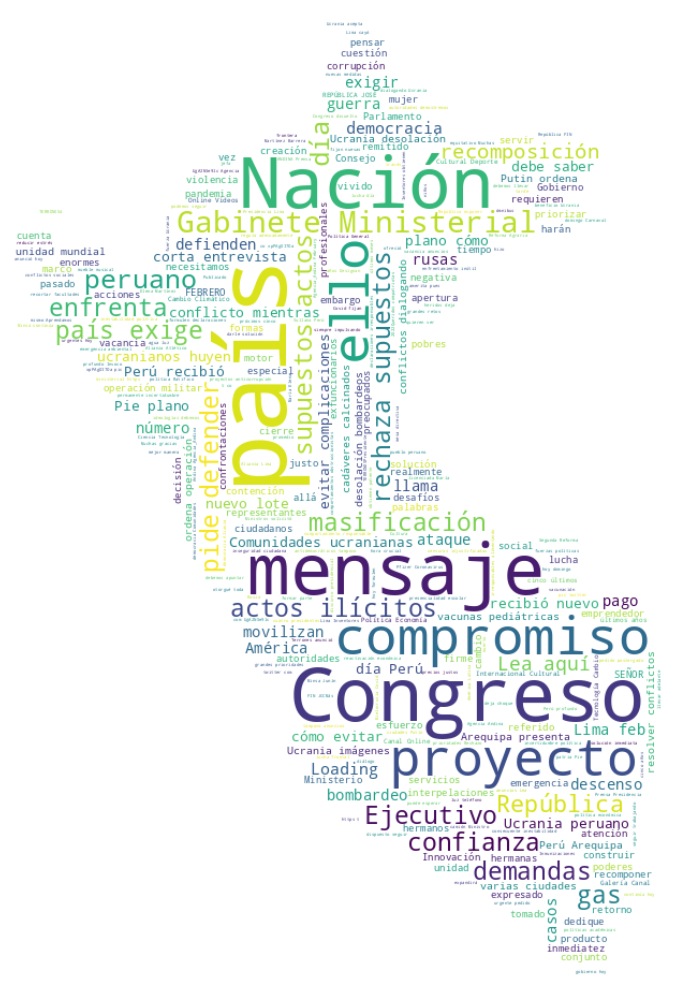

In [ ]:
fig_mx = plt.figure()
fig_mx.set_figwidth(14) # set width
fig_mx.set_figheight(18) # set height


plt.imshow(amlo_wc_mx, interpolation='bilinear')
plt.axis('off')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e1520ccc-3116-4c4c-abd4-6d261fee11d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>